## 1. Overview <a class="anchor" id="1"></a>

Bellabeat is a high-tech company that manufactures smart, health-focused products. They offer a variety of smart devices that collect data on activity, sleep, stress and reproductive health to empower women with knowledge about their own health and habits.

The primary focus of this case is analyzing smart device fitness data and determining how it can help unlock new growth opportunities for Bellabeat. We will focus on one of Bellabeat's products: the Bellabeat app which provides users with data on their health. This data can help users better understand their current habits and make healthy decisions.

## 2. Ask <a class="anchor" id="2"></a>

**1. What is the business task ?**
* Identify trends in how consumers use non-Bellabeat smart devices to apply insights into Bellabeat’s marketing strategy.

**2. Who is the stakeholders ?**
* Urška Sršen - Bellabeat cofounder and Chief Creative Officer
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team

**3. What is the business objectives ?**
* What are the trends identified?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?



**4. Deliverables:**
* A clear summary of the business task
* A description of all data sources used
* Documentation of any cleaning or manipulation of data
* A summary of analysis
* Supporting visualizations and key findings
* High-level content recommendations based on the analysis


## 3. Prepare <a class="anchor" id="3"></a>

**1 Information on Data Source:**
* The data is publicly available on [Kaggle: FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) and stored in 18 csv files. 
* Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
* 30 FitBit users who consented to the submission of personal tracker data.
* Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.

    
**2 Limitations of Data Set:**
* Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
* Sample size of 30 female FitBit users is not representative of the entire female population. 
* As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.


**3 Is Data ROCCC?**

A good data source is ROCCC which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.
* Reliable - LOW - Not reliable as it only has 30 respondents
* Original - LOW - Third party provider (Amazon Mechanical Turk)
* Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
* Current - LOW - Data is 5 years old and is not relevant
* Cited - LOW - Data collected from third party, hence unknown

Overall, the dataset is considered bad quality data and it is not recommended to produce business recommendations based on this data.

**4 Data Selection:**

The following file is selected and copied for analysis. 
* dailyActivity_merged.csv
* hourlyCalories_merged.csv
* hourlyIntensities_merged.csv
* hourlySteps_merged.csv
* sleepDay_merged.csv

## 4. Process <a class="anchor" id="4"></a>

### 4.1. Import libraries

In [1]:
library(readr)  
library(tidyverse)
library(lubridate)
library(janitor)
library(dplyr)
library(tidyr)
library(skimr)
library(ggplot2) 
library(openair)
library(psych) 
library(DataExplorer)
library(VennDiagram)
library(ggpubr)
library(here)
library(formattable)
library(scales)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.5.0 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   1.0.1      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘psych’


The following object is masked from ‘package:openair’:

    corPlot


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘ggpubr’


The following object is masked from ‘package:VennDiagram’:

   

### 4.2. Load data

In [2]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities<- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_ty

### 4.3. Verifying number of users

In [3]:
n_unique(daily_activity$Id)
n_unique(hourly_calories$Id)
n_unique(hourly_intensities$Id)
n_unique(hourly_steps$Id)
n_unique(sleep_day$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

### 4.4. Identify Duplicate

In [4]:
sum(duplicated(daily_activity))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_intensities))
sum(duplicated(hourly_steps))
sum(duplicated(sleep_day))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

### 4.5. Remove Duplicate and N/A

In [5]:
daily_activity <- daily_activity %>%
  distinct() %>%
  drop_na()
head(daily_activity,3)

hourly_calories <- hourly_calories %>%
  distinct() %>%
  drop_na()
head(hourly_calories,3)

hourly_intensities <- hourly_intensities %>%
  distinct() %>%
  drop_na()
head(hourly_intensities,3)

hourly_steps <- hourly_steps %>%
  distinct() %>%
  drop_na()
head(hourly_steps,3)

sleep_day <- sleep_day %>%
  distinct() %>%
  drop_na()
head(sleep_day,3)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442


Verify that duplicates have been removed

In [6]:
sum(duplicated(sleep_day))

[1] 0

### 4.6. Clean, Rename and Consistency Datetime Column

In [7]:
# Prepare daily_activity table:
daily <- daily_activity %>% 
  clean_names() %>% 
  mutate(activity_date = mdy(activity_date), day_week = weekdays(activity_date)) %>% 
  rename(date = activity_date) %>% 
  select(-c(5:10)) # drop redundant columns 
#Reorder columns by position
daily <- daily[, c(1,2,10,3,9,4:8)]
head(daily)
glimpse(daily)

id,date,day_week,total_steps,calories,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,13162,1985,8.50,25,13,328,728
1503960366,2016-04-13,Wednesday,10735,1797,6.97,21,19,217,776
1503960366,2016-04-14,Thursday,10460,1776,6.74,30,11,181,1218
1503960366,2016-04-15,Friday,9762,1745,6.28,29,34,209,726
1503960366,2016-04-16,Saturday,12669,1863,8.16,36,10,221,773
1503960366,2016-04-17,Sunday,9705,1728,6.48,38,20,164,539


Rows: 940
Columns: 10
$ id                     <dbl> 1503960366, 1503960366, 1503960366, 1503960366,…
$ date                   <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-15…
$ day_week               <chr> "Tuesday", "Wednesday", "Thursday", "Friday", "…
$ total_steps            <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019, …
$ calories               <dbl> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035,…
$ total_distance         <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.88,…
$ very_active_minutes    <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 41,…
$ fairly_active_minutes  <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21, …
$ lightly_active_minutes <dbl> 328, 217, 181, 209, 221, 164, 233, 264, 205, 21…
$ sedentary_minutes      <dbl> 728, 776, 1218, 726, 773, 539, 1149, 775, 818, …


In [8]:
# Join multiple hourly data 
hourly_activity <- hourly_calories %>% 
  left_join(hourly_intensities, by = c("Id", "ActivityHour")) %>% 
  left_join(hourly_steps, by = c("Id", "ActivityHour")) %>% 
  clean_names() %>% 
  mutate(activity_hour = mdy_hms(activity_hour),
         day_week = weekdays(activity_hour)) %>% 
  separate(col = activity_hour, into  = c("date", "time"), sep = " ") %>% 
  mutate(date = ymd(date)) %>% 
  select(-"average_intensity")
# Reorder columns
hourly_activity <- hourly_activity[,c(1,2,7,3,6,5,4)]
head(hourly_activity)

id,date,day_week,time,step_total,total_intensity,calories
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,00:00:00,373,20,81
1503960366,2016-04-12,Tuesday,01:00:00,160,8,61
1503960366,2016-04-12,Tuesday,02:00:00,151,7,59
1503960366,2016-04-12,Tuesday,03:00:00,0,0,47
1503960366,2016-04-12,Tuesday,04:00:00,0,0,48
1503960366,2016-04-12,Tuesday,05:00:00,0,0,48


In [9]:
# Prepare sleep_day table
sleep <- sleep_day %>% 
  clean_names() %>% 
  separate(col = sleep_day, c("date", "sleep_time"), sep = " ") %>%
  mutate(date = mdy(date),
         day_week = weekdays(date)) %>% 
  rename("sleep_records" = "total_sleep_records",
        "asleep_mins" = "total_minutes_asleep",
        "bed_mins" = "total_time_in_bed") %>% 
  select(-"sleep_time")
sleep <- sleep[,c(1,2,6,3,4,5)]
head(sleep)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 410 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


id,date,day_week,sleep_records,asleep_mins,bed_mins
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,1,327,346
1503960366,2016-04-13,Wednesday,2,384,407
1503960366,2016-04-15,Friday,1,412,442
1503960366,2016-04-16,Saturday,2,340,367
1503960366,2016-04-17,Sunday,1,700,712
1503960366,2016-04-19,Tuesday,1,304,320


### 4.7. Merging data
In this case, I merge daily and sleep table

In [10]:
# Merge the two dfs
step_sleep <- merge(daily, sleep, by = c("id", "date", "day_week"))
# There are replicates after merging dfs need to remove
step_sleep <- step_sleep[!duplicated(step_sleep), ]
# Check data
head(step_sleep)
str(step_sleep)
nrow(step_sleep)
n_unique(step_sleep$id)

,id,date,day_week,total_steps,calories,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,sleep_records,asleep_mins,bed_mins
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,Tuesday,13162,1985,8.50,25,13,328,728,1,327,346
2,1503960366,2016-04-13,Wednesday,10735,1797,6.97,21,19,217,776,2,384,407
3,1503960366,2016-04-15,Friday,9762,1745,6.28,29,34,209,726,1,412,442
4,1503960366,2016-04-16,Saturday,12669,1863,8.16,36,10,221,773,2,340,367
5,1503960366,2016-04-17,Sunday,9705,1728,6.48,38,20,164,539,1,700,712
6,1503960366,2016-04-19,Tuesday,15506,2035,9.88,50,31,264,775,1,304,320


'data.frame':	410 obs. of  13 variables:
 $ id                    : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                  : Date, format: "2016-04-12" "2016-04-13" ...
 $ day_week              : chr  "Tuesday" "Wednesday" "Friday" "Saturday" ...
 $ total_steps           : num  13162 10735 9762 12669 9705 ...
 $ calories              : num  1985 1797 1745 1863 1728 ...
 $ total_distance        : num  8.5 6.97 6.28 8.16 6.48 ...
 $ very_active_minutes   : num  25 21 29 36 38 50 28 19 41 39 ...
 $ fairly_active_minutes : num  13 19 34 10 20 31 12 8 21 5 ...
 $ lightly_active_minutes: num  328 217 209 221 164 264 205 211 262 238 ...
 $ sedentary_minutes     : num  728 776 726 773 539 775 818 838 732 709 ...
 $ sleep_records         : num  1 2 1 2 1 1 1 1 1 1 ...
 $ asleep_mins           : num  327 384 412 340 700 304 360 325 361 430 ...
 $ bed_mins              : num  346 407 442 367 712 320 377 364 384 449 ...


[1] 410

[1] 24

## 5. Analyze and Visualization <a class="anchor" id="5"></a>

### 5.1. Type of users per activity level 

We can classify the users by activity considering the daily amount of steps. We can categorize users as follows:

* Sedentary - Less than 5000 steps a day.
* Lightly active - Between  5000 and 7499 steps a day. 
* Fairly active - Between 7500 and 9999 steps a day.
* Very active - More than 10000 steps a day. 

In [11]:
user_type <- step_sleep %>%
  group_by(id) %>%
  summarise (mean_daily_steps = mean(total_steps), mean_daily_calories = mean(calories), mean_daily_sleep = mean(asleep_mins))%>%
   mutate(user_type = case_when(
    mean_daily_steps < 5000 ~ "sedentary",
    mean_daily_steps >= 5000 & mean_daily_steps < 7499 ~ "lightly active", 
    mean_daily_steps >= 7500 & mean_daily_steps < 9999 ~ "fairly active", 
    mean_daily_steps >= 10000 ~ "very active"
  ))

head(user_type)

id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12405.680,1872.280,360.2800,very active
1644430081,7967.750,2977.750,294.0000,fairly active
1844505072,3477.000,1676.333,652.0000,sedentary
1927972279,1490.000,2316.200,417.0000,sedentary
2026352035,5618.679,1540.786,506.1786,lightly active
2320127002,5079.000,1804.000,61.0000,lightly active


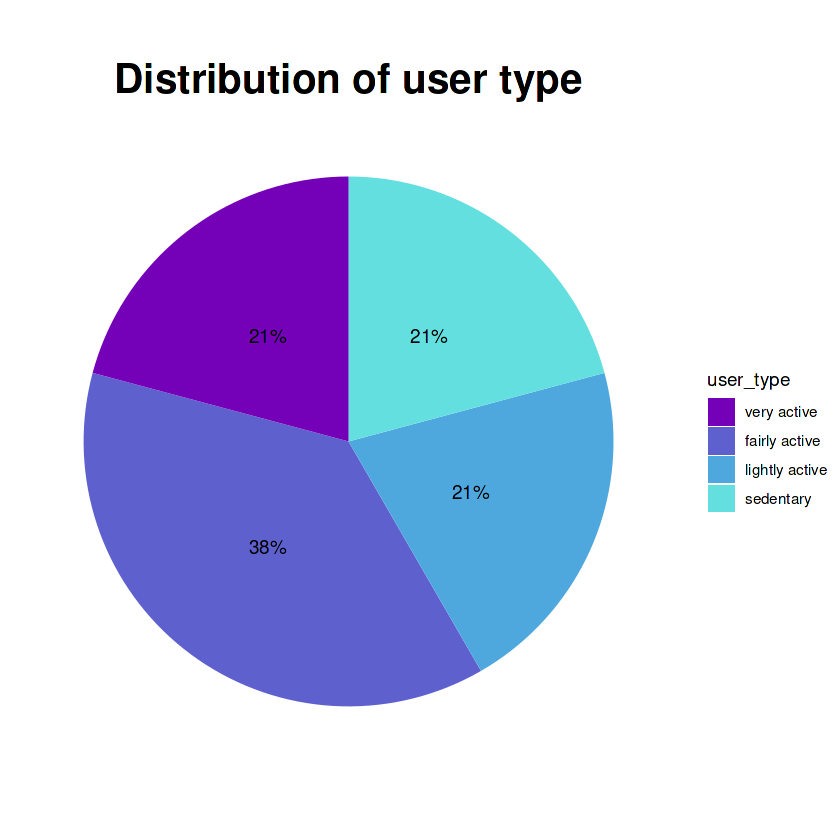

In [12]:
distribution_user_type <- user_type %>%
  group_by(user_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(user_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

distribution_user_type$user_type <- factor(distribution_user_type$user_type , levels = c("very active", "fairly active", "lightly active", "sedentary"))

ggplot(data=distribution_user_type,aes(x="",y=total_percent, fill=user_type)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=24, face = "bold")) +
  scale_fill_manual(values = c("#7400b8","#5e60ce", "#4ea8de", "#64dfdf")) +
  geom_text(aes(label = labels),position = position_stack(vjust = 0.5))+
  labs(title="Distribution of user type")

**Finding:**
* Highest user type is fairly active with 38%
* Number of user type who very active is low where it's just 21%
* Number of user type who except very active is 80%

### 5.2.  Use of Smart Device

We will calculate the number of users that use their smart device on a daily basis, classifying our sample into three categories knowing that the date interval is 31 days:

* high use - users who use their device between 21 and 31 days.
* moderate use - users who use their device between 10 and 20 days.
* low use - users who use their device between 1 and 10 days.

In [13]:
# Get number of days a user used their device in a 31 day period:
obs_days <- step_sleep %>% group_by(id) %>% 
  summarise(num_dayuse = sum(n()), .groups = "drop") %>% 
  arrange(-num_dayuse)
summary(obs_days$num_dayuse)
glimpse(obs_days)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    4.75   20.50   17.08   27.25   31.00 

Rows: 24
Columns: 2
$ id         <dbl> 5553957443, 6962181067, 8378563200, 2026352035, 3977333714,…
$ num_dayuse <int> 31, 31, 31, 28, 28, 28, 27, 26, 26, 25, 24, 23, 18, 15, 15,…


In [14]:
# Classify users into usage ranges
usage <- obs_days %>% 
  mutate(usage = case_when(
    between(num_dayuse, 1, 10) ~ "low usage",
    between(num_dayuse, 11, 20) ~ "moderate usage",
    between(num_dayuse, 21, 31) ~ "high usage",
    TRUE ~ NA_character_
    ))
# Create a df with new attributes
usage_df <- step_sleep %>% 
  left_join(usage, by = "id")
# Compute percentage of each usage groups 
sum_usage <- usage %>% 
  mutate(usage = fct_relevel(usage, c("high usage", "moderate usage", "low usage"))) %>% 
  group_by(usage) %>%  
  summarise(num_users = n()) %>% 
  mutate(percent = num_users/sum(num_users)) %>% mutate(labels = scales::percent(percent))
head(usage)
head(usage_df)
formattable(sum_usage, list(percent = color_bar("yellow")))

id,num_dayuse,usage
<dbl>,<int>,<chr>
5553957443,31,high usage
6962181067,31,high usage
8378563200,31,high usage
2026352035,28,high usage
3977333714,28,high usage
4445114986,28,high usage


,id,date,day_week,total_steps,calories,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,sleep_records,asleep_mins,bed_mins,num_dayuse,usage
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1503960366,2016-04-12,Tuesday,13162,1985,8.50,25,13,328,728,1,327,346,25,high usage
2,1503960366,2016-04-13,Wednesday,10735,1797,6.97,21,19,217,776,2,384,407,25,high usage
3,1503960366,2016-04-15,Friday,9762,1745,6.28,29,34,209,726,1,412,442,25,high usage
4,1503960366,2016-04-16,Saturday,12669,1863,8.16,36,10,221,773,2,340,367,25,high usage
5,1503960366,2016-04-17,Sunday,9705,1728,6.48,38,20,164,539,1,700,712,25,high usage
6,1503960366,2016-04-19,Tuesday,15506,2035,9.88,50,31,264,775,1,304,320,25,high usage


usage,num_users,percent,labels
<fct>,<int>,<dbl>,<chr>
high usage,12,0.500,50%
moderate usage,3,0.125,12%
low usage,9,0.375,38%


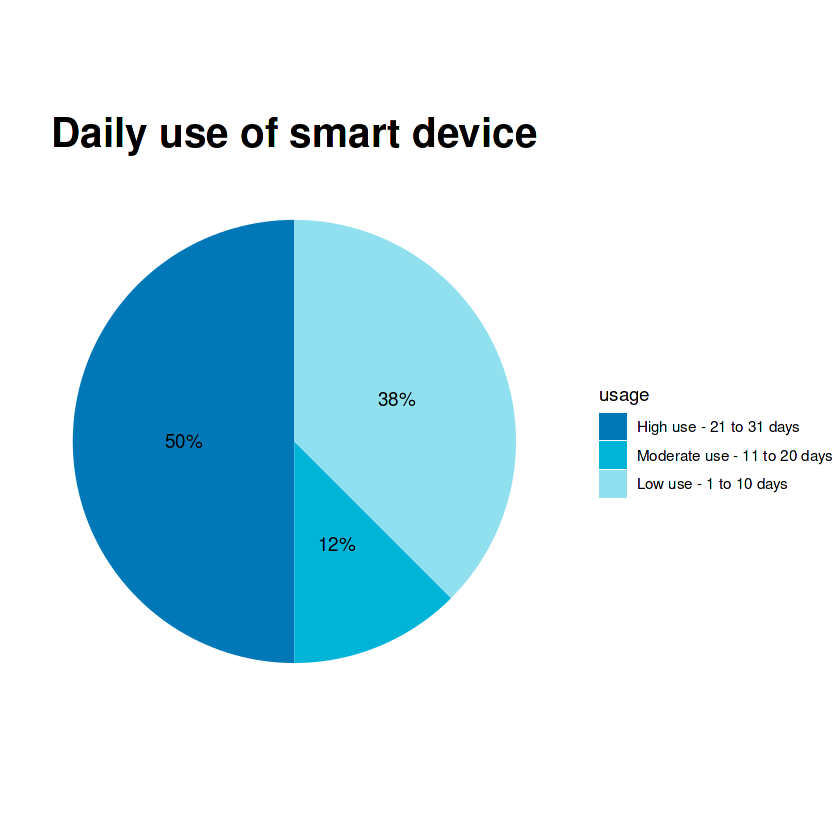

In [15]:
sum_usage %>%
  ggplot(aes(x="",y=percent, fill=usage)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=24, face = "bold")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c("#0077b6","#00b4d8","#90e0ef"),
                    labels = c("High use - 21 to 31 days","Moderate use - 11 to 20 days","Low use - 1 to 10 days"))+
  labs(title="Daily use of smart device")

**Finding:**
* Highest daily use of smart device is 50%
* Number of moderate and low use is 50%

## 5.3. Step, Distance and Minute Asleep Per Weekday

In [16]:
weekday_steps_sleep <- step_sleep %>%
  mutate(weekday = weekdays(date))

weekday_steps_sleep$weekday <-ordered(weekday_steps_sleep$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

 weekday_steps_sleep <- weekday_steps_sleep %>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(total_steps),daily_distance = mean(total_distance), daily_sleep = mean(asleep_mins))

head(weekday_steps_sleep)

weekday,daily_steps,daily_distance,daily_sleep
<ord>,<dbl>,<dbl>,<dbl>
Monday,9273.217,6.540870,419.5000
Tuesday,9182.692,6.430000,404.5385
Wednesday,8022.864,5.719849,434.6818
Thursday,8183.516,5.773438,401.2969
Friday,7901.404,5.511930,405.4211
Saturday,9871.123,7.015789,419.0702


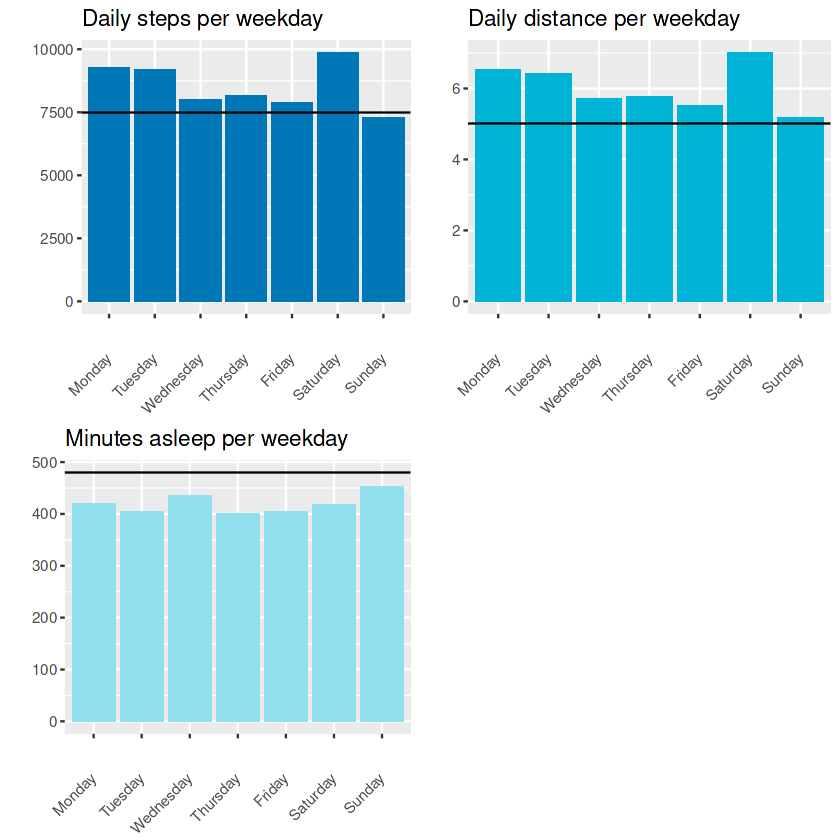

In [17]:
ggarrange(
    ggplot(weekday_steps_sleep) +
      geom_col(aes(weekday, daily_steps), fill = "#0077b6") +
      geom_hline(yintercept = 7500) +
      labs(title = "Daily steps per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1)),
    ggplot(weekday_steps_sleep) +
      geom_col(aes(weekday, daily_distance), fill = "#00b4d8") +
      geom_hline(yintercept = 5) +
      labs(title = "Daily distance per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1)),
    ggplot(weekday_steps_sleep, aes(weekday, daily_sleep)) +
      geom_col(fill = "#90e0ef") +
      geom_hline(yintercept = 480) +
      labs(title = "Minutes asleep per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))
  )

**Finding:**
* Daily steps and distance have reached the target
* But the minutes of sleep have not reached the target of 8 hours per day

## 5.4. Correlation

In [18]:
# Merging hourly data to daily step/sleep data
step_sleephour <- merge(hourly_activity, usage_df, by = c("id", "date", "day_week"))
# Remove Replicates if any
step_sleephour <- step_sleephour[!duplicated(step_sleephour), ]
# Check data
head(step_sleephour,3)
nrow(step_sleephour)
n_unique(step_sleephour$id)

,id,date,day_week,time,step_total,total_intensity,calories.x,total_steps,calories.y,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,sleep_records,asleep_mins,bed_mins,num_dayuse,usage
,<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1503960366,2016-04-12,Tuesday,12:00:00,253,11,73,13162,1985,8.5,25,13,328,728,1,327,346,25,high usage
2,1503960366,2016-04-12,Tuesday,19:00:00,558,39,104,13162,1985,8.5,25,13,328,728,1,327,346,25,high usage
3,1503960366,2016-04-12,Tuesday,07:00:00,0,0,47,13162,1985,8.5,25,13,328,728,1,327,346,25,high usage


[1] 9699

[1] 24

Warning message:
“The dot-dot notation (`..r.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(r.label)` instead.”


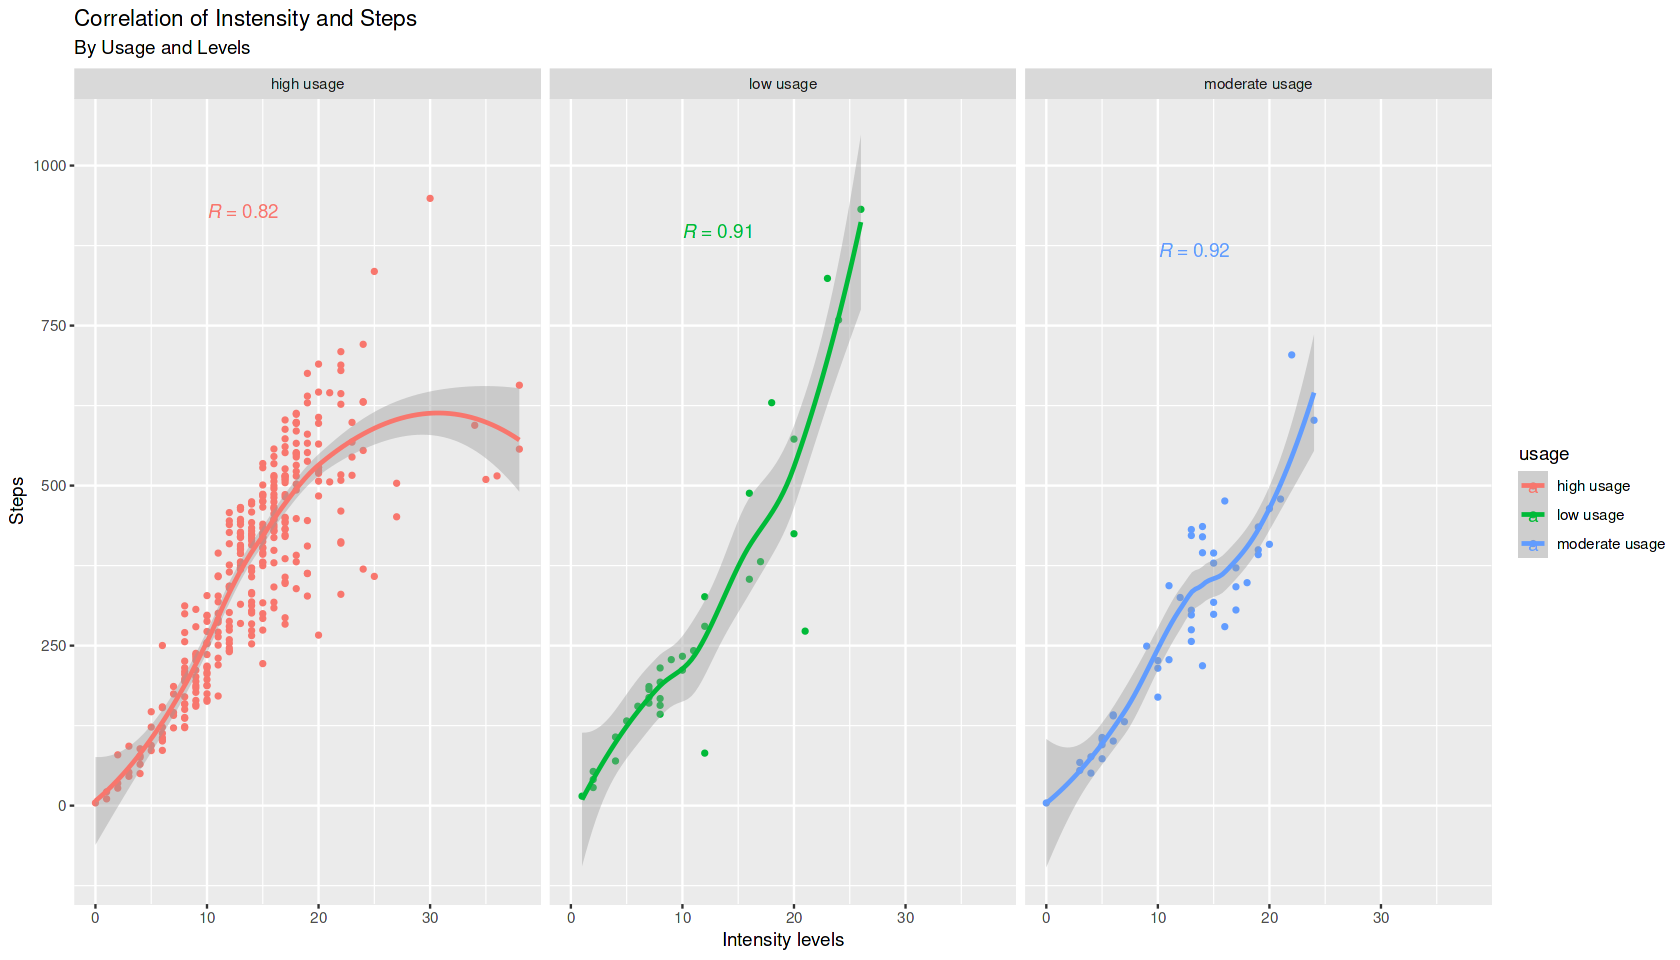

In [19]:
# Scatter plot correlation between intensity/steps
ints_step <- step_sleephour %>% 
  group_by(usage, id, date) %>% 
  summarise(intensity = round(mean(total_intensity),0),
            steps = round(mean(step_total),2), .groups = "drop") %>% 
ggplot(aes(x= intensity, y = steps, color = usage, show.legend = FALSE))+ 
         geom_point(size = 1)+
geom_smooth(method = 'loess', formula = y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Intensity levels" , y="Steps")+
  ggtitle("Correlation of Instensity and Steps", "By Usage and Levels")+
  facet_wrap(~usage)
options(repr.plot.width = 14, repr.plot.height = 8)
ints_step

**Finding:**
* Intensity vs step have positive correlation per usage

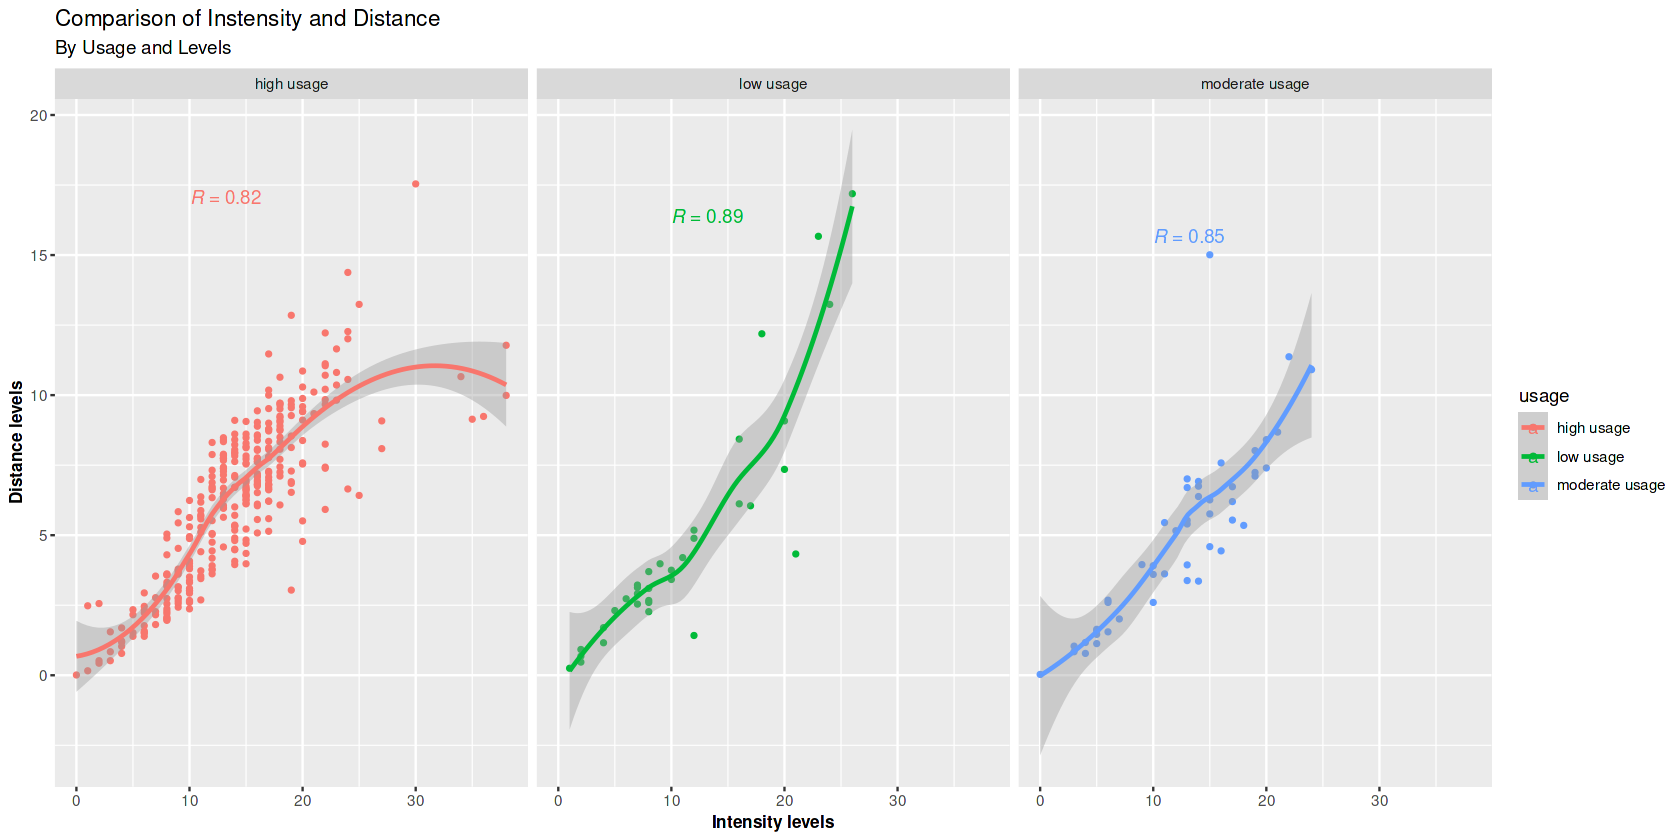

In [20]:
# Scatter plot correlation between intensity/distance
ints_dist <- step_sleephour %>% 
  group_by(usage, id, date) %>% 
  summarise(intensity = round(mean(total_intensity),0),
            distance = round(mean(total_distance),2), .groups = "drop") %>% 
ggplot(aes(x= intensity, y = distance, color = usage, show.legend = FALSE))+ 
         geom_point(size = 1)+ geom_smooth(method = 'loess', formula= y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Intensity levels" , y="Distance levels")+
  ggtitle("Comparison of Instensity and Distance", "By Usage and Levels")+
  theme(axis.title.x = element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))+
  facet_wrap(~usage)
options(repr.plot.width = 14, repr.plot.height = 7)
ints_dist

**Finding:**
* Intensity vs distance have positive correlation per usage

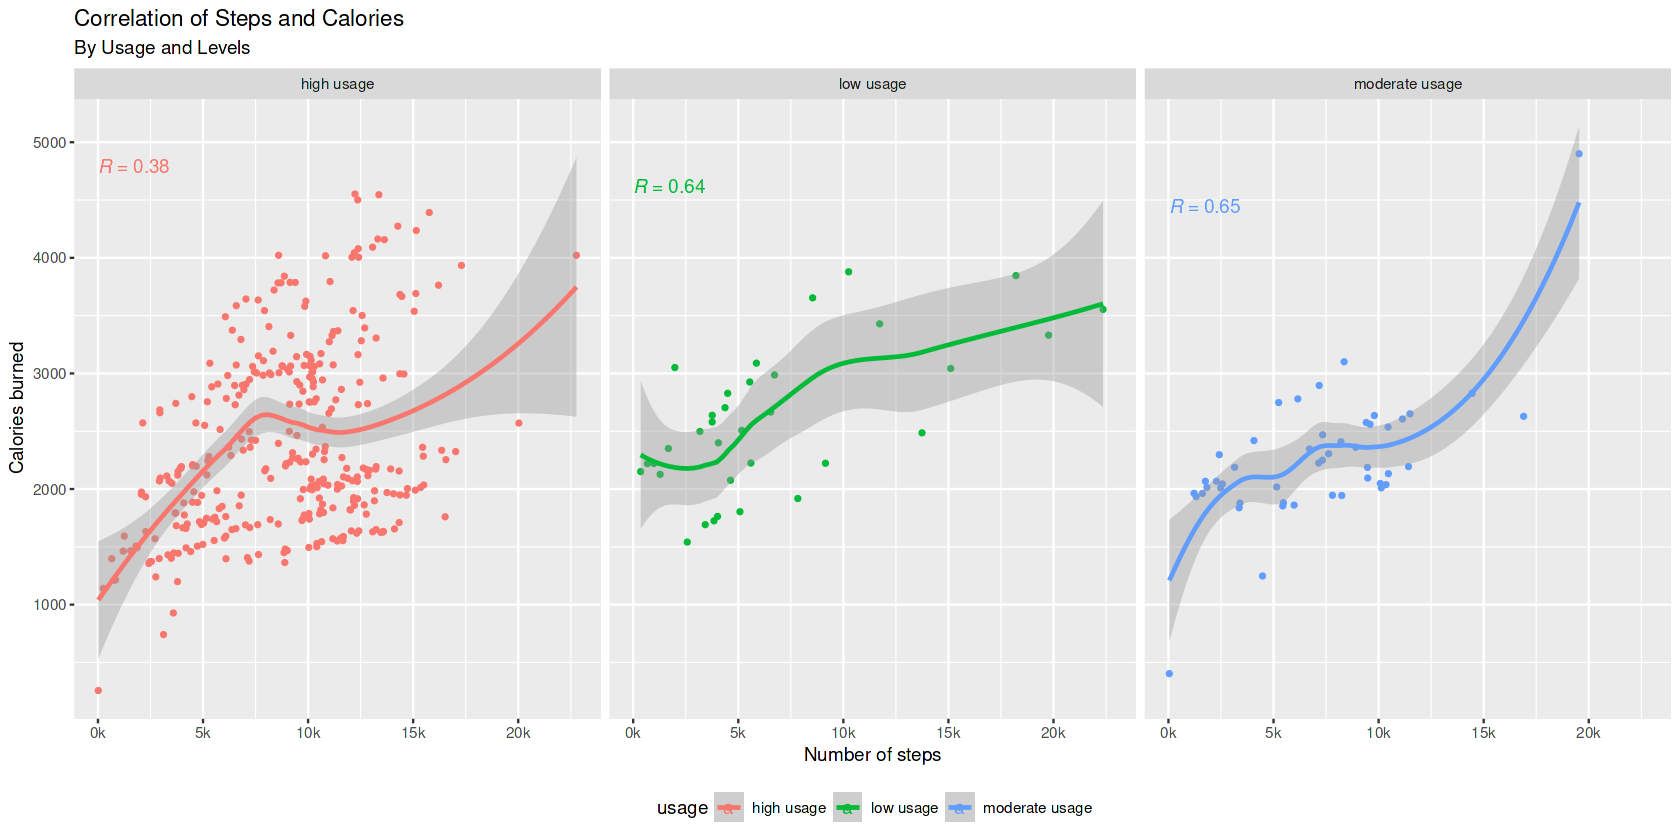

In [21]:
# Scatter plot correlation between Steps and Calories 
steps_cals <- usage_df %>% 
  group_by(usage, date, id) %>% 
  summarise(cals = round(mean(calories),0),
            steps = round(mean(total_steps),2), .groups = "drop")
  
ks <- function (steps) { number_format(accuracy = 1,  scale = 1/1000,suffix = "k",big.mark = ",")(steps) }  
                                 
ggplot(steps_cals, aes(x= steps, y = cals, color = usage))+ 
         geom_point(size = 1)+ geom_smooth(method = 'loess', formula= y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Number of steps" , y="Calories burned")+
  ggtitle("Correlation of Steps and Calories", "By Usage and Levels")+
  theme(legend.position = "bottom")+
  scale_x_continuous(labels = ks)+
  facet_wrap(~usage)
options(repr.plot.width = 14, repr.plot.height = 7)

**Finding:**
* Number of steps vs calories burned have positive correlation per usage

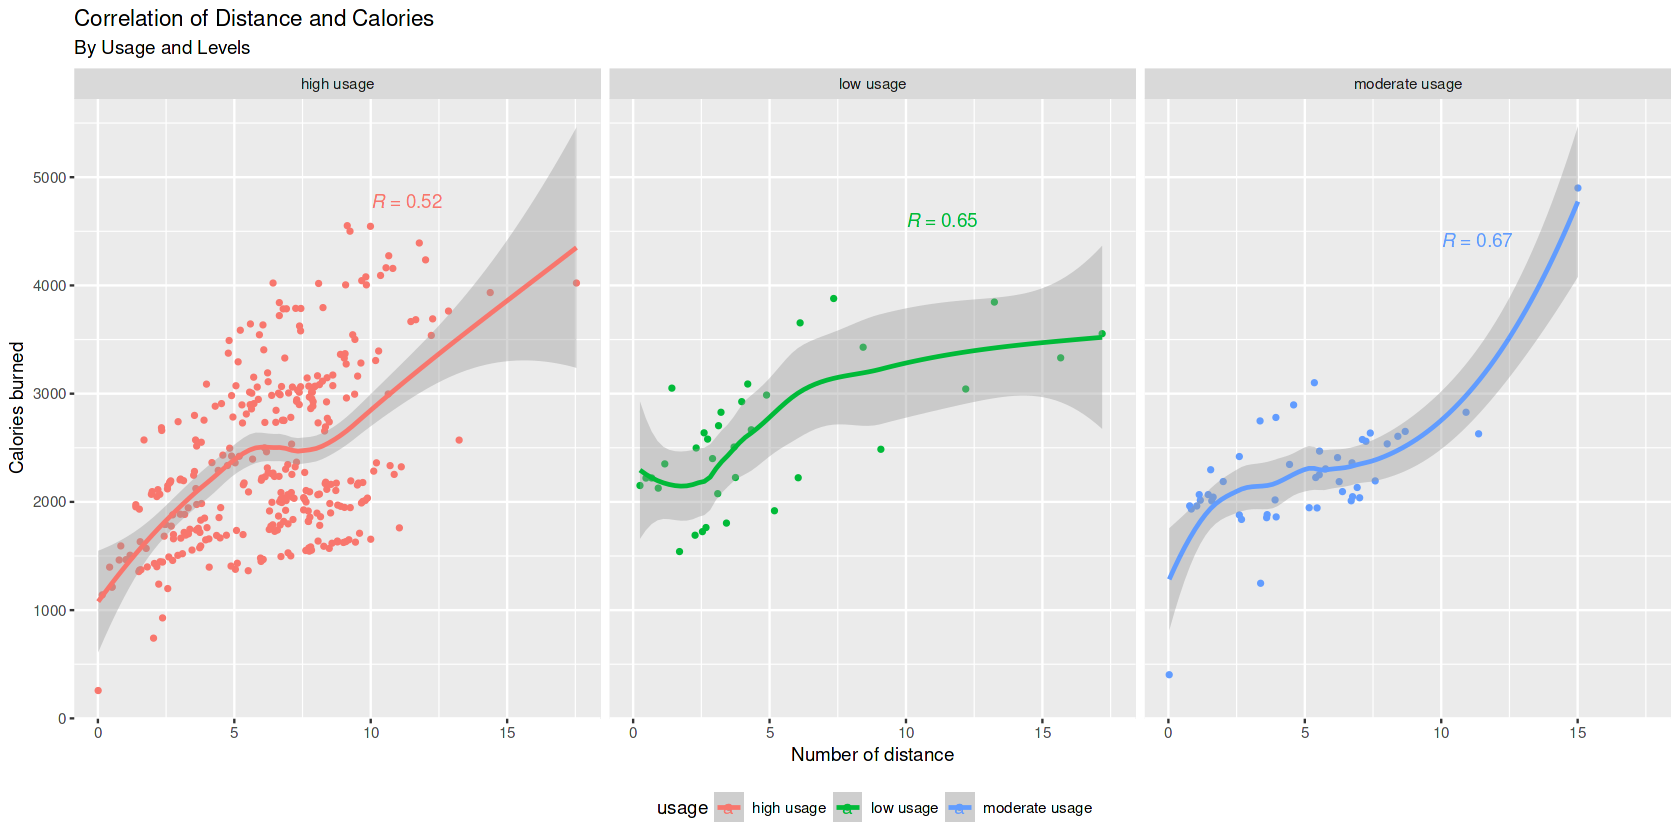

In [22]:
# Scatter plot correlation between Distance and Calories 
steps_cals <- usage_df %>% 
  group_by(usage, date, id) %>% 
  summarise(cals = round(mean(calories),0),
            distance = round(mean(total_distance),2), .groups = "drop")

ggplot(steps_cals, aes(x= distance, y = cals, color = usage, show.legend = FALSE))+ 
         geom_point(size = 1)+ geom_smooth(method = 'loess', formula= y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Number of distance" , y="Calories burned")+
  ggtitle("Correlation of Distance and Calories", "By Usage and Levels")+
  theme(legend.position = "bottom")+
  facet_wrap(~usage)
options(repr.plot.width = 14, repr.plot.height = 7)

**Finding:**
* Distance vs calories burned have positive correlation per usage

## 6. Conclusions and Recomendation <a class="anchor" id="6"></a>

|What are the trends identified?|How could these trends apply to Bellabeat customers?|How could these trends help influence Bellabeat marketing strategy?|
|---| ---| ---|
|Highest user type is fairly active with 38%, number of user type who very active is low where it's just 21% and number of user type who except very active is 80%.|Users should be more active with their daily activities. That way the trend of very active users will be increase.|Send warning notifications for less active users.|
|Highest daily use of smart device is 50% with high use and number of moderate and low use is 50%.|Users should use the bellabeat app more often to guide their activities and record their health.|Send warning notifications for moderate use and low use users who are less than 21 days. Make activity and health records more interactive with users.|
|Daily steps and distance have reached the target but the minutes of sleep have not reached the target of 8 hours per day |Users should sleep or rest more to maintain health and reach the target of sleeping 8 hours per day.|Send alert notifications for sleep deprived users. Create alarms for bedtime and wake-up times to keep the user's bedtime regular.|
|Intensity vs step and intensity vs distance have positive correlation per usage. Number of steps vs calories burned and Number of distance vs calories burned have positive correlation per usage.|The user should increase the activity intensity to increase the number of steps and distance. Increasing the number of steps and distance will also increase the number of calories burned so that users become healthier.|Create a target number of steps and a target number of distances that must be covered by the user per day. Alert users if they haven't reached their daily target.|